dataframe shape:  (71242, 19)
dataframe columns:  Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')
dataframe dtypes:  ARREST_KEY                    int64
ARREST_DATE                  object
PD_CD                         int64
PD_DESC                      object
KY_CD                       float64
OFNS_DESC                    object
LAW_CODE                     object
LAW_CAT_CD                   object
ARREST_BORO                  object
ARREST_PRECINCT               int64
JURISDICTION_CODE             int64
AGE_GROUP                    object
PERP_SEX                     object
PERP_RACE                    object
X_COORD_CD                    int64
Y_COORD_CD                    int64
Latitude                    float

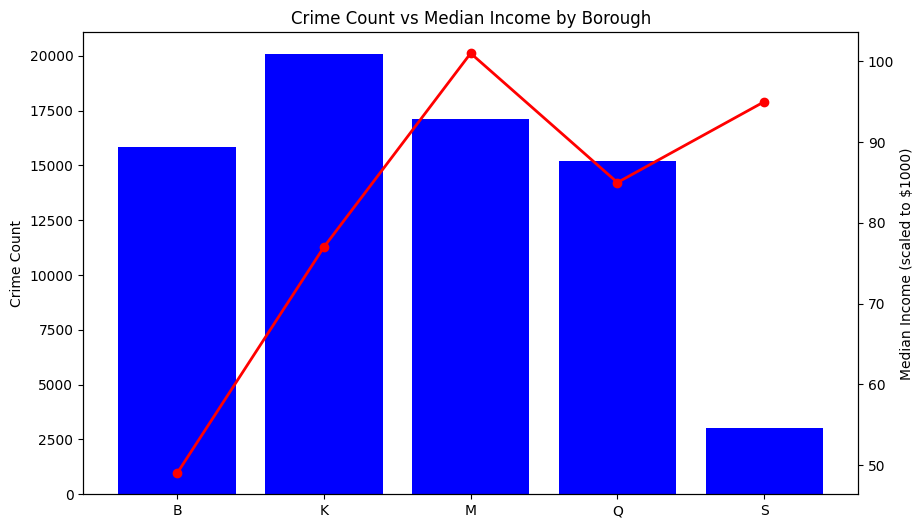

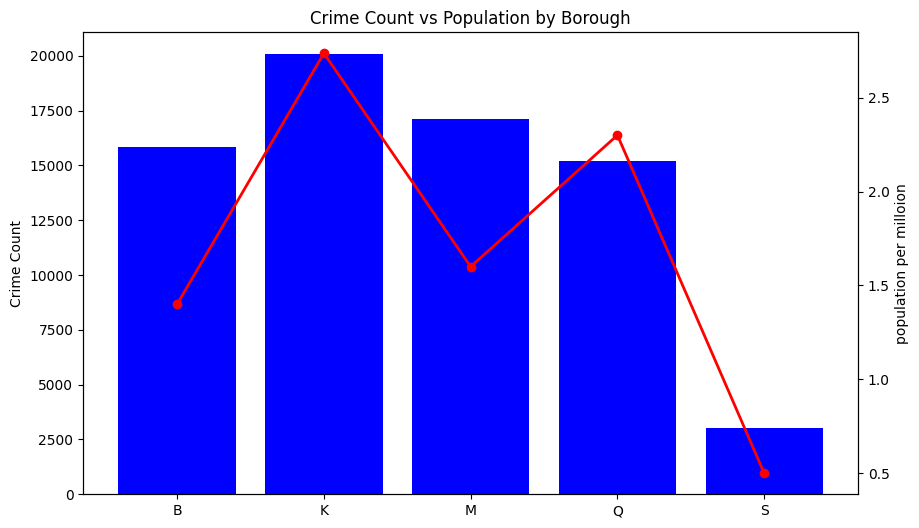

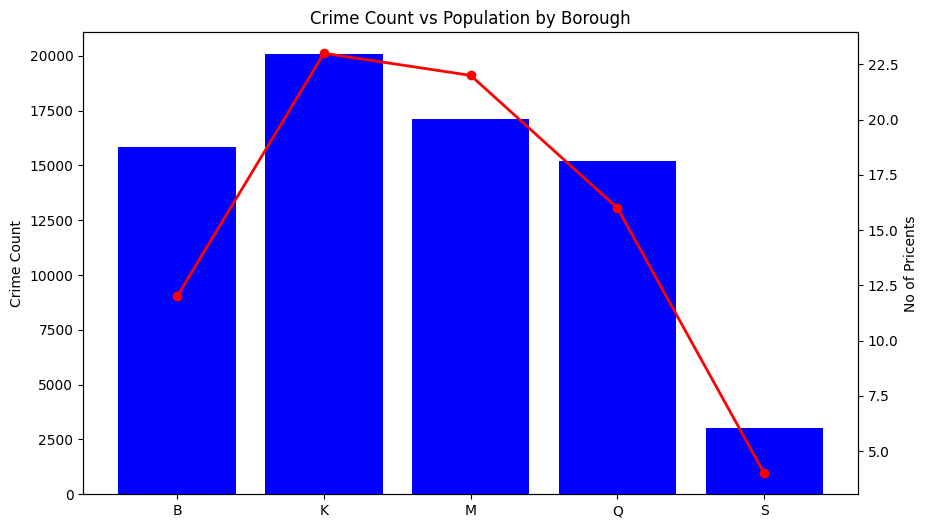

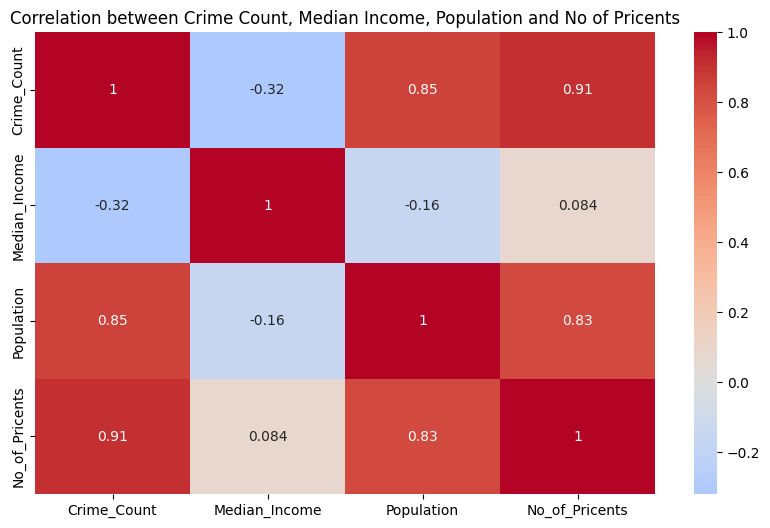

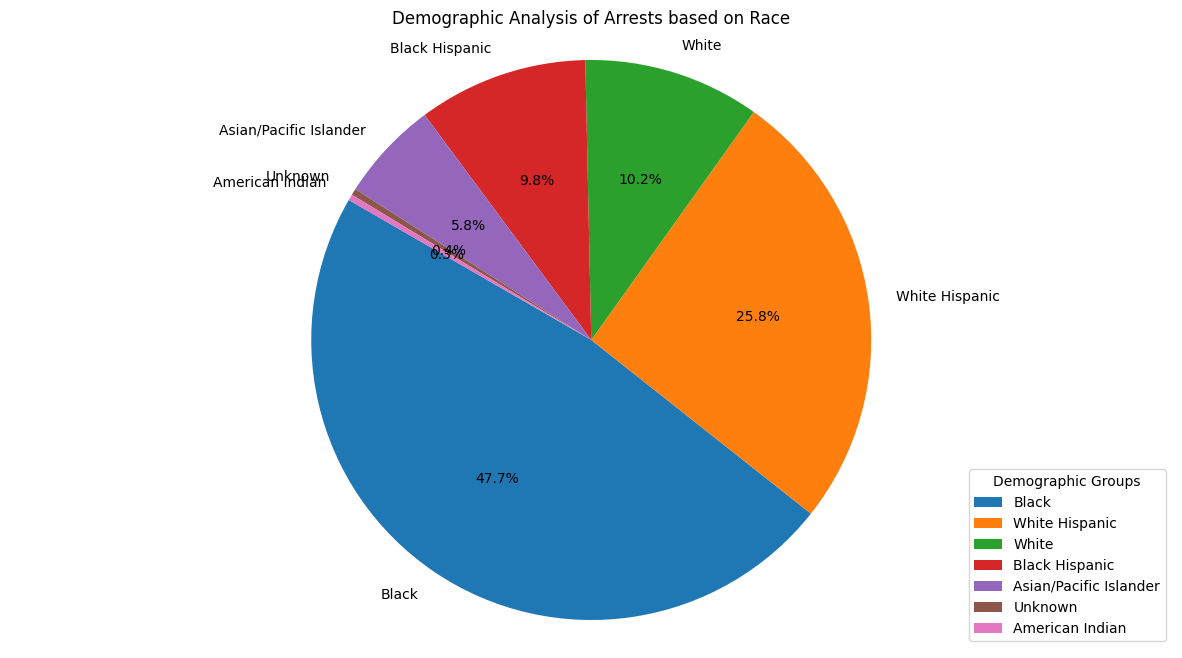

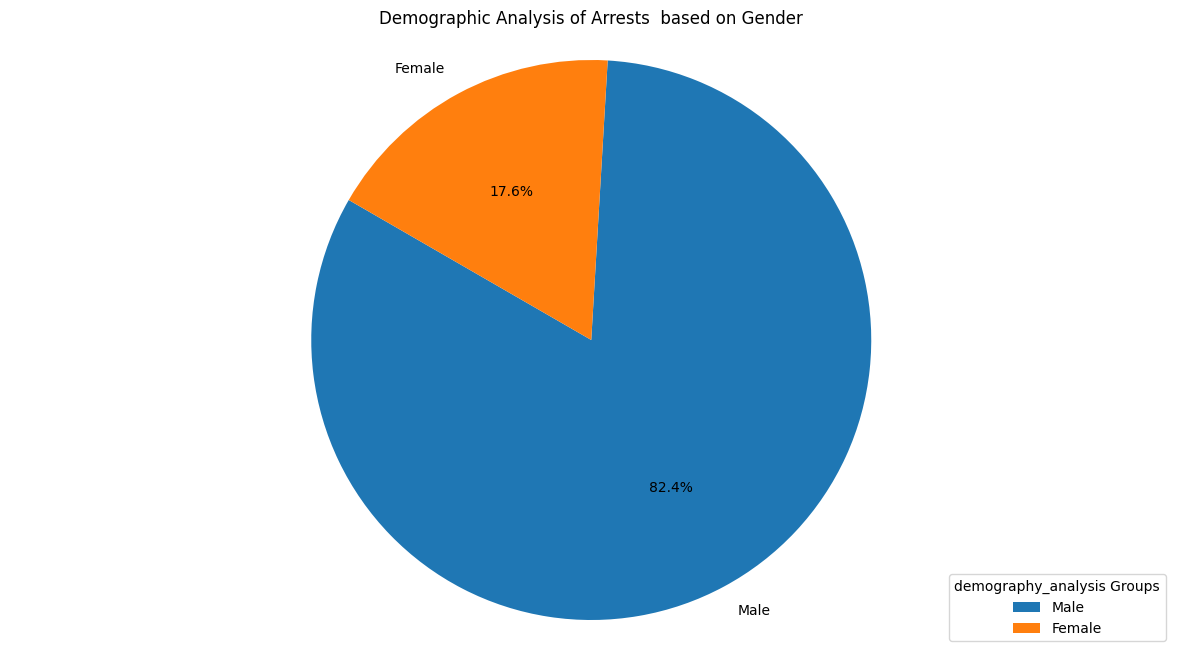

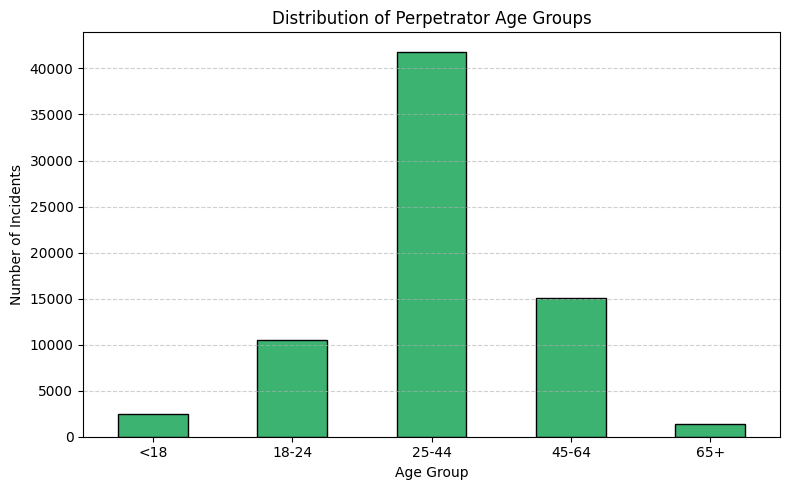

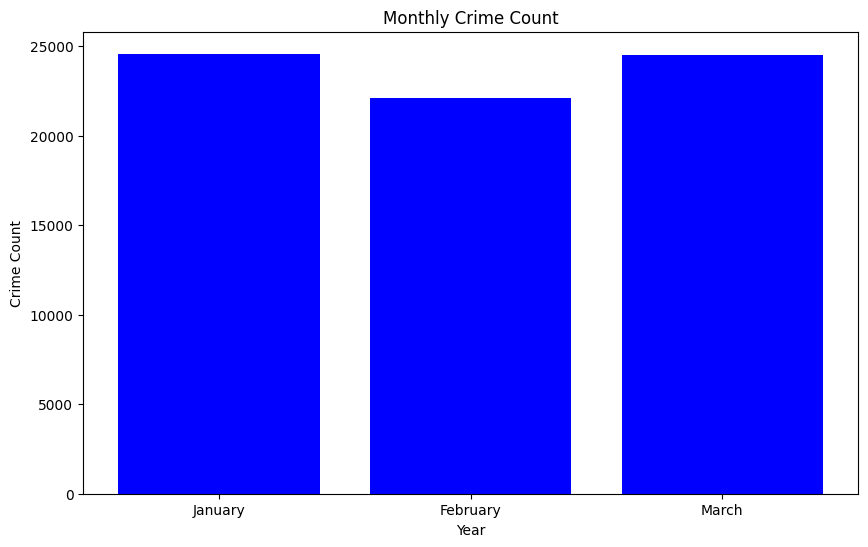

Cluster 0: forgery, felo, misd, unclassified, illegal, veh, possession, fraud, fraudulent, fugitive

Cluster 1: unclassified, traffic, misdemean, assault, area, robbery, menacing, unknown, burglary, open

Cluster 2: assault, larceny, areas, open, petit, criminal, public, possession, administration, unclassi

Cluster 3: controlled, substance, possessi, intent, sale, possess, homicide, forgery, fraud, fraudulent

Cluster 4: unclassifie, services, theft, forcible, forgery, fraud, fraudulent, fugitive, gambling, general

Cluster Keywords:


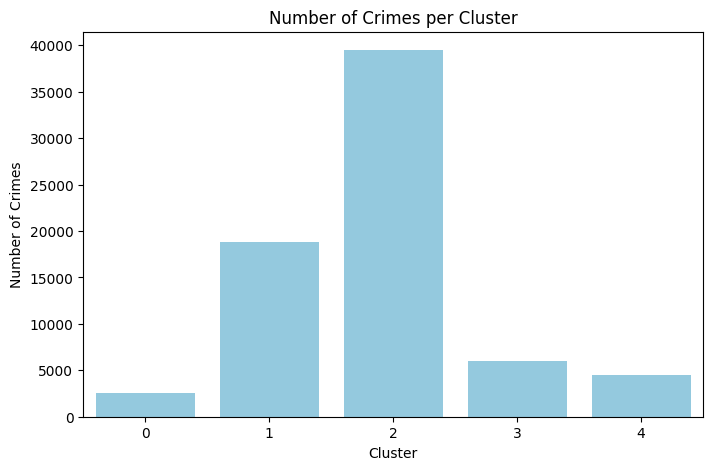

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
def eda(df):
    print("dataframe shape: ", df.shape)
    print("dataframe columns: ", df.columns)
    print("dataframe dtypes: ", df.dtypes)

def boro_vise_analyis(df):
    boro_crime_count = df.groupby('ARREST_BORO')['ARREST_KEY'].count()
    boro_avg_income = {
        'B': 49,  # Bronx
        'K': 77,  # Brooklyn
        'M': 101, # Manhattan
        'Q': 85,  # Queens
        'S': 95   # Staten Island
    }
    boro_population = {
        'B': 1.4,  # Bronx
        'K': 2.736, # Brooklyn
        'M': 1.6,   # Manhattan
        'Q': 2.3,   # Queens
        'S': 0.5    # Staten Island
    }
    boro_no_of_pricents = { 
        'B': 12,  # Bronx
        'K': 23,  # Brooklyn
        'M': 22,   # Manhattan
        'Q': 16,  # Queens
        'S': 4  # Staten Island
    }
    boro_df = pd.DataFrame({
        'Borough': boro_crime_count.index,
        'Crime_Count': boro_crime_count.values,
        'Population': [boro_population[boro] for boro in boro_crime_count.index],
        'Median_Income': [boro_avg_income[boro] for boro in boro_crime_count.index],
        'No_of_Pricents': [boro_no_of_pricents[boro] for boro in boro_crime_count.index]
    })
    incomes = [boro_avg_income[boro] for boro in boro_crime_count.index]
    #income vs crime count
    fig, ax1 = plt.subplots(figsize=(10, 6))
    bars = ax1.bar(boro_crime_count.index, boro_crime_count.values, color='blue', label='Crime Count')
    ax1.set_ylabel('Crime Count', color='black')
    ax1.tick_params(axis='y', labelcolor='black')
    ax2 = ax1.twinx()
    ax2.plot(boro_crime_count.index, boro_df['Median_Income'], color='red', linewidth=2,marker='o')
    ax2.set_ylabel('Median Income (scaled to $1000)', color='black')
    ax2.tick_params(axis='y', labelcolor='black')
    plt.title('Crime Count vs Median Income by Borough')
    plt.show()
    #population vs crime count
    fig, ax1 = plt.subplots(figsize=(10, 6))
    bars = ax1.bar(boro_crime_count.index, boro_crime_count.values, color='blue', label='Crime Count')
    ax1.set_ylabel('Crime Count', color='black')
    ax1.tick_params(axis='y', labelcolor='black')
    ax2 = ax1.twinx()
    ax2.plot(boro_crime_count.index,boro_df['Population'] , color='red', linewidth=2,marker='o')
    ax2.set_ylabel('population per milloion', color='black')
    ax2.tick_params(axis='y', labelcolor='black')
    plt.title('Crime Count vs Population by Borough')
    plt.show()
    #no of pricents vs crime count
    fig, ax1 = plt.subplots(figsize=(10, 6))
    bars = ax1.bar(boro_crime_count.index, boro_crime_count.values, color='blue', label='Crime Count')
    ax1.set_ylabel('Crime Count', color='black')
    ax1.tick_params(axis='y', labelcolor='black')
    ax2 = ax1.twinx()
    ax2.plot(boro_crime_count.index,boro_df['No_of_Pricents'] , color='red', linewidth=2,marker='o')
    ax2.set_ylabel('No of Pricents', color='black')
    ax2.tick_params(axis='y', labelcolor='black')
    plt.title('Crime Count vs Population by Borough')
    plt.show()
    #correlation matrix
    fig, ax1 = plt.subplots(figsize=(10, 6))
    corrq=boro_df[['Crime_Count','Median_Income','Population','No_of_Pricents']].corr()
    sns.heatmap(corrq, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation between Crime Count, Median Income, Population and No of Pricents')
    plt.show()
def demography_analysis(df):
    # Demographic analysis baced on race
    demographic_counts = df['PERP_RACE'].value_counts()
    demographic_counts = demographic_counts.rename(index={
    'BLACK': 'Black',
    'WHITE': 'White',
    'WHITE HISPANIC': 'White Hispanic',
    'BLACK HISPANIC': 'Black Hispanic',
    'ASIAN / PACIFIC ISLANDER': 'Asian/Pacific Islander',
    'UNKNOWN': 'Unknown',
    'AMERICAN INDIAN/ALASKAN NATIVE': 'American Indian'
    })

    plt.figure(figsize=(15, 8))
    plt.pie( demographic_counts.values,labels=demographic_counts.index, autopct='%1.1f%%', startangle=150)
    plt.legend(title='Demographic Groups',loc='lower right')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Demographic Analysis of Arrests based on Race')
    plt.show()
    # Demographic analysis based on gender
    demographic_counts = df['PERP_SEX'].value_counts()
    demographic_counts = demographic_counts.rename(index={
        'M': 'Male',
        'F': 'Female',
        'U': 'Unknown'})
    plt.figure(figsize=(15, 8))
    plt.pie(demographic_counts.values,labels=demographic_counts.index, autopct='%1.1f%%', startangle=150)
    plt.legend(title='demography_analysis Groups',loc='lower right')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Demographic Analysis of Arrests  based on Gender')
    # Demographic analysis based on age
    # Desired order of age groups
    age_order = ['<18', '18-24', '25-44', '45-64', '65+']
    age_counts = df['AGE_GROUP'].value_counts().reindex(age_order)
    plt.figure(figsize=(8, 5))
    age_counts.plot(kind='bar', color='mediumseagreen', edgecolor='black')

    plt.title("Distribution of Perpetrator Age Groups")
    plt.xlabel("Age Group")
    plt.ylabel("Number of Incidents")
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
def temporal_analysis(df):
    # Temporal analysis
    df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])
    df['Month'] = df['ARREST_DATE'].dt.month
    df['Day'] = df['ARREST_DATE'].dt.day
    
    # Monthly crime count
    monthly_crime_count = df.groupby('Month')['ARREST_KEY'].count()
    monthly_crime_count = monthly_crime_count.rename(index={
        1: 'January',
        2: 'February',
        3: 'March',
        4: 'April',
        5: 'May',
        6: 'June',
        7: 'July',
        8: 'August',
        9: 'September',
        10: 'October',
        11: 'November',
        12: 'December'
    })
    plt.figure(figsize=(10, 6))
    plt.bar(monthly_crime_count.index, monthly_crime_count.values, color='blue')
    plt.title('Monthly Crime Count')
    plt.xlabel('Year')
    plt.ylabel('Crime Count')
    plt.show()
def crime_hotspot_heatmap(df):
    df_clean = df[(df['Latitude'] != 0) & (df['Longitude'] != 0)]
    nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11, tiles='CartoDB dark_matter')
    heat_data = list(zip(df_clean['Latitude'], df_clean['Longitude']))
    HeatMap(heat_data, radius=8, blur=10, max_zoom=13).add_to(nyc_map)
    return nyc_map

def create_clustered_df(df, n_clusters=5):
    df_clean = df[df['PD_DESC'].notnull()].copy()
    tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
    X = tfidf.fit_transform(df_clean['PD_DESC'])
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df_clean['Cluster'] = kmeans.fit_predict(X)
    svd = TruncatedSVD(n_components=2, random_state=42)
    components = svd.fit_transform(X)
    df_clean['Component1'] = components[:, 0]
    df_clean['Component2'] = components[:, 1]
    return df_clean, tfidf, kmeans

def get_cluster_labels(tfidf, kmeans, n=5):
    terms = tfidf.get_feature_names_out()
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    cluster_keywords = {}
    for i in range(n):
        top_terms = [terms[ind] for ind in order_centroids[i, :10]]
        cluster_keywords[i] = top_terms
        print(f"Cluster {i}: {', '.join(top_terms)}\n")
    return cluster_keywords

def plot_clusters(df_clustered):
    plt.figure(figsize=(12,8))
    palette = sns.color_palette("tab10", n_colors=len(df_clustered['Cluster'].unique()))
    for cluster_id, color in zip(sorted(df_clustered['Cluster'].unique()), palette):
        subset = df_clustered[df_clustered['Cluster'] == cluster_id]
        plt.scatter(subset['Component1'], subset['Component2'], s=40, alpha=0.7, label=f'Cluster {cluster_id}', color=color)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('Crime Clusters Projection')
    plt.legend()
    plt.grid(True)
    plt.show()
def plot_cluster_counts(df_clustered):
    cluster_counts = df_clustered['Cluster'].value_counts().sort_index()
    plt.figure(figsize=(8,5))
    sns.barplot(x=cluster_counts.index, y=cluster_counts.values, color='skyblue')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Crimes')
    plt.title('Number of Crimes per Cluster')
    plt.xticks(rotation=0)
    plt.show()
if __name__ == "__main__":
    df = pd.read_csv('NYPD_Arrest_Data__Year_to_Date_.csv')
    eda(df)
    df_clustered, tfidf, kmeans = create_clustered_df(df, n_clusters=5)
    boro_vise_analyis(df)
    demography_analysis(df)
    temporal_analysis(df)
    crime_hotspot_map = crime_hotspot_heatmap(df)
    crime_hotspot_map.save('crime_hotspot_heatmap.html')
    cluster_keywords = get_cluster_labels(tfidf, kmeans, n=5)
    print("Cluster Keywords:")
    plot_cluster_counts(df_clustered)